## Importing of libraries and modules

In [2]:
import pandas 
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split

In [3]:
data1 = pd.read_excel('data.xls')
data1 = data1.replace(
{
    "What was your SLC percentage?":'[A-Za-z()%]',
    "What was your +2 percentage?":'[A-Za-z()%]',
    "What was your KUCAT score?":'[A-Za-z()%]'
    
},'' ,regex=True
)
df4 = data1['What was your KUCAT score?']
x=np.array(df4)
y=x.astype(int)

import pandas as pd
data2 = pd.DataFrame(data1)
subset=data2.iloc[:,:]
subset["What was your KUCAT score?"]=y
data2 = data2.fillna({
   "Do you have any mentors other than family members who can help you in your studies?":'no' })
def transform(x):
    if x == 'No':
        return 'no'
    if x == 'Yes':
        return 'yes'
    if x == 'NO':
        return 'no'
    if x == 'no':
        return 'no'
    if x == 'yes':
        return 'yes'
data2['Do you have any mentors other than family members who can help you in your studies?']=data2['Do you have any mentors other than family members who can help you in your studies?'].apply(transform)

data2=pd.get_dummies( data2,columns=['Have you cleared all your papers you have appeared in?',
                                     'How seriously do you take your pre examination breaks?'
                                    ,'What is your hours of self study per day?'
                                    ,'How much time do you spend in googling study materials?'
                                    ,'Do you have a personal hobby?'
                                    ,"Do you do your assignment yourself? "
                                    ,'How is your class attendance?'
                                    ,"What are your parents' professions?"
                                    ,"What study materials do you rely on?"
                                    ,"How often do you take online courses?"
                                    ,"Where are you currently staying?"
                                    ,"Is there any senior or junior member in your family also studying Computer Science?"
                                    ,"Do you have any mentors other than family members who can help you in your studies?"
                                    ,"Do you have any family problems?"
                                    ,"Do you have any health problems?"
                                    ,"Which stream are you in"
                                    ,"How do you do your assignments? "
                                    ,"Which semester are you studying in?"])
                                        
data2


,Which school did you p1ss SLC from?,Which school did you pass +2 from?,What was your SLC percentage?,What was your +2 percentage?,What was your KUCAT score?,What were your GPAs in all semester?(answer using spaces),How interactive and attentive are you during lecture?( 5 being very attentive ),Have you cleared all your papers you have appeared in?_No,Have you cleared all your papers you have appeared in?_Yes,How seriously do you take your pre examination breaks?_I study occasionally,...,How do you do your assignments? _Text book and reference books;Surf the internet;Consult with seniors,How do you do your assignments? _Text book and reference books;Surf the internet;Visit the photocopy kiosk,How do you do your assignments? _Visit the photocopy kiosk,How do you do your assignments? _Visit the photocopy kiosk;Consult with seniors,Which semester are you studying in?_2,Which semester are you studying in?_3,Which semester are you studying in?_4,Which semester are you studying in?_5,Which semester are you studying in?_6,Which semester are you studying in?_8
0,1,1,85.60,78.600,1066,3.4867,3,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,1,1,84.60,86.400,1040,3.6400,3,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,1,1,86.12,82.200,1168,3.9700,3,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,1,1,90.00,80.000,945,3.6400,3,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,1,1,86.00,81.000,1113,3.8167,4,0,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,1,1,84.00,78.000,1010,3.4330,3,0,1,1,...,0,0,0,0,0,0,0,0,1,0
131,2,2,85.00,0.730,1107,3.5400,3,0,1,1,...,0,0,0,0,0,0,0,0,1,0
132,2,1,91.50,81.800,1179,3.6240,4,0,1,0,...,0,0,0,0,0,0,0,0,1,0
133,2,1,84.60,0.852,1230,3.3660,4,0,1,1,...,0,0,0,0,0,0,0,0,1,0


In [4]:

#deleting outliers
subset_outlier=data2.iloc[:,:]

q75, q25 =np.percentile(subset_outlier["What was your KUCAT score?"],[75,25])
lower =q25-1.5*(q75-q25)
upper=q75 +1.5*(q75-q25)
subset_outlier["What was your KUCAT score?"][subset_outlier["What was your KUCAT score?"] > upper]=upper
subset_outlier["What was your KUCAT score?"][subset_outlier["What was your KUCAT score?"] < lower]=lower

data2['What was your KUCAT score?']=subset_outlier['What was your KUCAT score?']

<ipython-input-4-211e4b179278>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_outlier["What was your KUCAT score?"][subset_outlier["What was your KUCAT score?"] > upper]=upper
<ipython-input-4-211e4b179278>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_outlier["What was your KUCAT score?"][subset_outlier["What was your KUCAT score?"] < lower]=lower


In [5]:
df4 = data2['What was your +2 percentage?']
y=pd.to_numeric(df4, errors='coerce')
#If ‘coerce’, then invalid parsing will be set as NaN
data2 = pd.DataFrame(data2)
subset=data2.iloc[:,:]
subset["What was your +2 percentage?"]=y

In [6]:
df4 = data2['What was your SLC percentage?']
y=pd.to_numeric(df4, errors='coerce')
#If ‘coerce’, then invalid parsing will be set as NaN
data2 = pd.DataFrame(data2)
subset=data2.iloc[:,:]
subset["What was your SLC percentage?"]=y

In [7]:
subset_outlier=data2.iloc[:,:]

q75, q25 =np.percentile(subset_outlier["What was your +2 percentage?"],[75,25])
lower =q25-1.5*(q75-q25)
upper=q75 +1.5*(q75-q25)
subset_outlier["What was your +2 percentage?"][subset_outlier["What was your +2 percentage?"] > upper]=upper
subset_outlier["What was your +2 percentage?"][subset_outlier["What was your +2 percentage?"] < lower]=lower
data2['What was your +2 percentage?']=subset_outlier['What was your +2 percentage?']

<ipython-input-7-efecce8a0dc0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_outlier["What was your +2 percentage?"][subset_outlier["What was your +2 percentage?"] > upper]=upper
<ipython-input-7-efecce8a0dc0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_outlier["What was your +2 percentage?"][subset_outlier["What was your +2 percentage?"] < lower]=lower


In [8]:

#deleting outliers
subset_outlier=data2.iloc[:,:]

q75, q25 =np.percentile(subset_outlier["What was your SLC percentage?"],[75,25])
lower =q25-1.5*(q75-q25)
upper=q75 +1.5*(q75-q25)
subset_outlier["What was your SLC percentage?"][subset_outlier["What was your SLC percentage?"] > upper]=upper
subset_outlier["What was your SLC percentage?"][subset_outlier["What was your SLC percentage?"] < lower]=lower
data2['What was your +2 percentage?']=subset_outlier['What was your +2 percentage?']

<ipython-input-8-dfa972fc17ee>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_outlier["What was your SLC percentage?"][subset_outlier["What was your SLC percentage?"] > upper]=upper
<ipython-input-8-dfa972fc17ee>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_outlier["What was your SLC percentage?"][subset_outlier["What was your SLC percentage?"] < lower]=lower


In [9]:
from sklearn.preprocessing import scale
df4 = data2['What was your +2 percentage?']
x=np.array(df4)
df5 = data2['What was your KUCAT score?']
y=np.array(df5)
df6 = data2['What was your SLC percentage?']
z=np.array(df6)

p=np.nan_to_num(x)
#converting nan to a number and storing it as an array p


In [10]:
q=np.nan_to_num(y)

In [11]:
r=np.nan_to_num(z)

In [12]:
#replacing the old column with an array
data2 = pd.DataFrame(data2)
subset=data2.iloc[:,:]
subset["What was your +2 percentage?"]=p

In [13]:
data2 = pd.DataFrame(data2)
subset=data2.iloc[:,:]
subset["What was your SLC percentage?"]=r


In [14]:
data2 = pd.DataFrame(data2)
subset=data2.iloc[:,:]
subset["What was your KUCAT score?"]=q

In [15]:

data_scale=scale(data2[['What was your SLC percentage?','What was your +2 percentage?','What was your KUCAT score?']])

In [16]:
data2 = pd.DataFrame(data2)
subset=data2.iloc[:,:]
subset[['What was your SLC percentage?','What was your +2 percentage?','What was your KUCAT score?']]=data_scale


In [17]:
data2

,Which school did you p1ss SLC from?,Which school did you pass +2 from?,What was your SLC percentage?,What was your +2 percentage?,What was your KUCAT score?,What were your GPAs in all semester?(answer using spaces),How interactive and attentive are you during lecture?( 5 being very attentive ),Have you cleared all your papers you have appeared in?_No,Have you cleared all your papers you have appeared in?_Yes,How seriously do you take your pre examination breaks?_I study occasionally,...,How do you do your assignments? _Text book and reference books;Surf the internet;Consult with seniors,How do you do your assignments? _Text book and reference books;Surf the internet;Visit the photocopy kiosk,How do you do your assignments? _Visit the photocopy kiosk,How do you do your assignments? _Visit the photocopy kiosk;Consult with seniors,Which semester are you studying in?_2,Which semester are you studying in?_3,Which semester are you studying in?_4,Which semester are you studying in?_5,Which semester are you studying in?_6,Which semester are you studying in?_8
0,1,1,0.272973,0.662981,0.693788,3.4867,3,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,1,1,0.045576,1.147429,0.518997,3.6400,3,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,1,1,0.391219,0.886573,1.379509,3.9700,3,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,1,1,1.273519,0.749933,-0.119665,3.6400,3,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,1,1,0.363932,0.812042,1.009758,3.8167,4,0,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,1,1,-0.090862,0.625716,0.317314,3.4330,3,0,1,1,...,0,0,0,0,0,0,0,0,1,0
131,2,2,0.136535,-1.756155,0.969421,3.5400,3,0,1,1,...,0,0,0,0,0,0,0,0,1,0
132,2,1,1.614614,0.861729,1.453460,3.6240,4,0,1,0,...,0,0,0,0,0,0,0,0,1,0
133,2,1,0.045576,-1.756155,1.796320,3.3660,4,0,1,1,...,0,0,0,0,0,0,0,0,1,0


In [18]:
data2.drop('What were your GPAs in all semester?(answer using spaces)', axis=1, inplace=True)

In [19]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
b=data1['What were your GPAs in all semester?(answer using spaces)']
X, y = data2, b
X_new = SelectKBest(f_regression, k=30).fit(X,y)
X_new1 = X_new.transform(X)#transform(X, y)
print (X_new1.shape)
#print (X_new.shape)

print(X.columns[X_new.get_support()]) 

(135, 30)
Index(['What was your SLC percentage?', 'What was your +2 percentage?',
       'What was your KUCAT score?',
       'How interactive and attentive are you during lecture?( 5 being very attentive ) ',
       'Have you cleared all your papers you have appeared in?_No',
       'Have you cleared all your papers you have appeared in?_Yes',
       'How seriously do you take your pre examination breaks?_I take it as a vacation',
       'How seriously do you take your pre examination breaks?_I take it seriously',
       'Do you have a personal hobby?_no',
       'Do you do your assignment yourself? _No',
       'Do you do your assignment yourself? _Yes',
       'How is your class attendance?_average',
       'How is your class attendance?_hardly 80%',
       'How is your class attendance?_very good',
       'What are your parents' professions?_p',
       'What study materials do you rely on?_Notes of classmates',
       'Where are you currently staying?_KU area',
       'Where are yo

In [20]:
from sklearn.model_selection import train_test_split
a=data1['What were your GPAs in all semester?(answer using spaces)']
X_train, X_test,y_train, y_test=train_test_split(X_new1,a,random_state=1)

print (X_test.shape)
print (X_train.shape)
print (y_train.shape)
print (y_test.shape)
#from sklearn.feature_selection import SelectKBest


#X, y = X_train, y_train
#X_new = SelectKBest(f_regression, k=30).fit_transform(X, y)
#print (X_new.shape)


(34, 30)
(101, 30)
(101,)
(34,)


In [21]:
from sklearn import linear_model
linreg=linear_model.LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

In [22]:
print(linreg.intercept_)
print(linreg.coef_)

3.04876782177583
[ 0.12734737  0.0384958   0.16005703  0.00139894 -0.12654061  0.12654061
  0.082111    0.03364198  0.00346858 -0.24039785 -0.07410733 -0.03282235
 -0.00253911  0.03536146 -0.01331383  0.06175435  0.00720744 -0.00720744
  0.01083289 -0.01083289  0.04466525 -0.04466525  0.05410451 -0.05410451
  0.15787223  0.06508423 -0.42067679  0.12623862 -0.25997785  0.03032983]


In [23]:
y_pred=linreg.predict(X_test)
y_pred.shape

(34,)

In [24]:
print(y_test)

42     3.1000
36     3.4000
93     3.3940
5      2.8000
65     2.6200
108    2.5000
56     2.9700
17     3.4167
53     2.7850
120    3.6020
69     2.7500
119    3.3900
44     3.1750
59     4.0000
89     2.4000
115    2.5000
33     2.2000
78     2.8670
125    3.2200
16     2.9000
48     3.3300
92     2.3880
45     3.5900
31     3.5000
4      3.8167
128    3.3440
118    3.0000
35     3.5500
55     2.6850
104    3.0175
40     3.2700
132    3.6240
123    3.3500
62     3.3400
Name: What were your GPAs in all semester?(answer using spaces), dtype: float64


In [25]:
print(y_pred)

[3.38302295 3.36292445 3.42045551 3.11225369 3.01970954 2.42682853
 3.03563075 3.3649296  3.12851241 3.31796408 2.89700214 3.50545158
 3.00672385 3.38929453 2.21783746 2.39375046 2.66474788 2.89949994
 3.35281707 2.93984174 3.63312212 2.75939663 2.9179026  3.55736107
 3.63034508 3.08383719 3.00915222 3.03240317 2.59567324 3.20556241
 3.51787841 3.85405889 3.44843247 3.39761044]


In [26]:
from sklearn import metrics
import numpy as np
#print (metrics.accuracy_score(y_test,y_pred))
print (metrics.mean_absolute_error(y_test,y_pred))
print (metrics.mean_squared_error(y_test,y_pred))
print (np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
#print (metrics.confusion_matrix(y_test,y_pred))


0.21073545956084344
0.0733347374361924
0.27080387263883876


In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

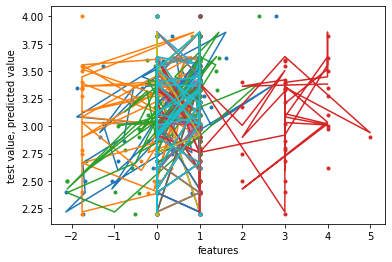

In [28]:
plt.xlabel('features')
plt.ylabel('test value, predicted value')
plt.plot(X_test,y_test,'.',X_test,y_pred,'-')
plt.show()

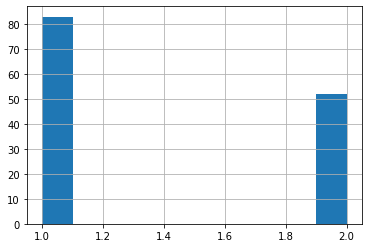

In [29]:
data2['Which school did you p1ss SLC from?'].hist()
plt.show()

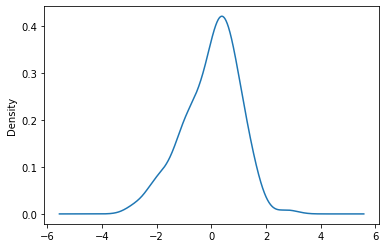

In [30]:
data2['What was your SLC percentage?'].plot(kind='density', subplots=True, layout=(1,1), sharex=False )
plt.show()

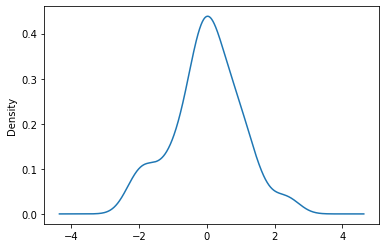

In [31]:

data2['What was your KUCAT score?'].plot(kind='density', subplots=True, layout=(1,1), sharex=False)
plt.show()

NameError: name 'ax' is not defined

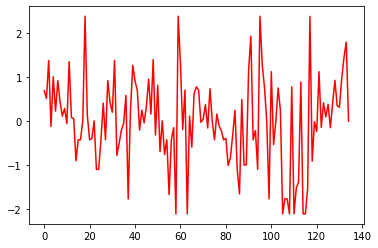

In [35]:
plt.plot(data2['What was your KUCAT score?'],'r')
ax.set_xlabel("2013", fontsize=12)


(135, 30)